In [1]:
%load_ext autoreload
from pathlib import Path

In [2]:
%autoreload 2

from process.parse_markdown import load_content
from process.graph import DocumentGraph

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1500: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from partially initialized module 'gi' (most likely due to a circular import) (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [3]:
content_directory = Path("process/test-content")
doc_map = load_content(content_directory)
graph = DocumentGraph(doc_map=doc_map)

In [172]:
v = next(graph.vertices)
v.uuid

'2da3dd4c-2d5b-4f94-82b4-67bcda214798'

In [76]:
graph.predicates

['in', 'is', 'ref', 'cite']

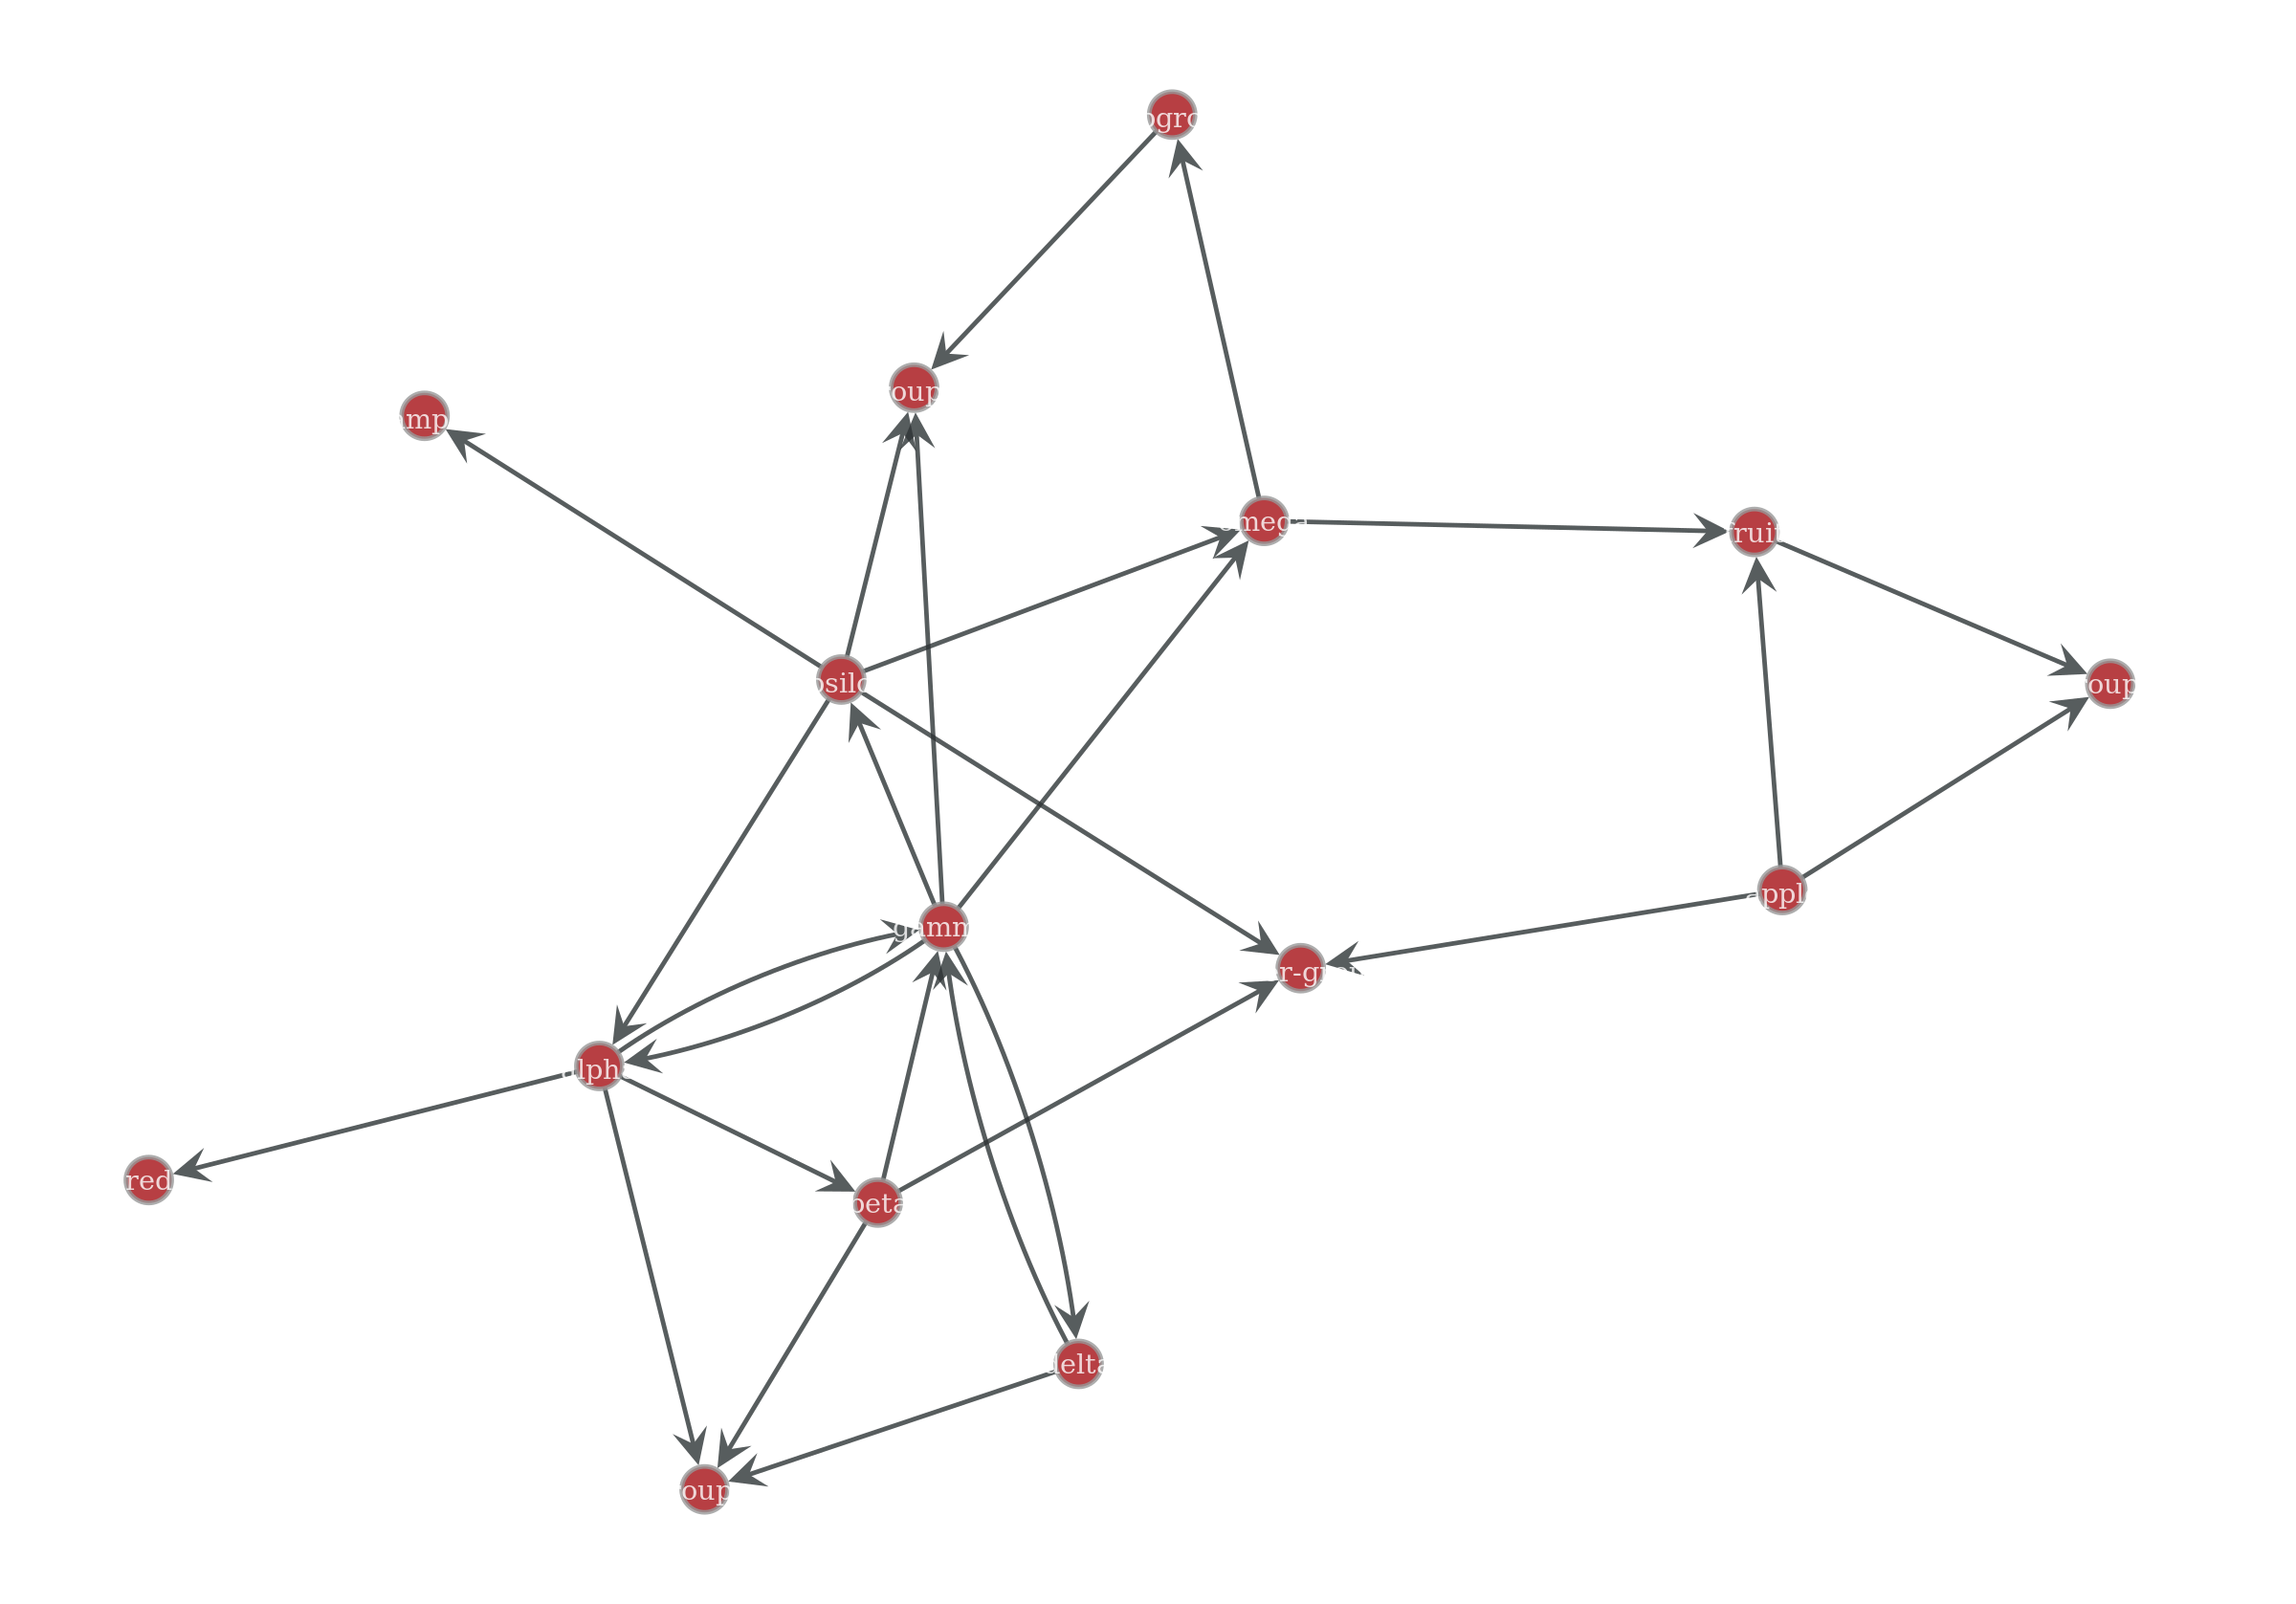

In [26]:
#layout = graph.layout("sfdp")
graph.draw(output_size=(1200,600))

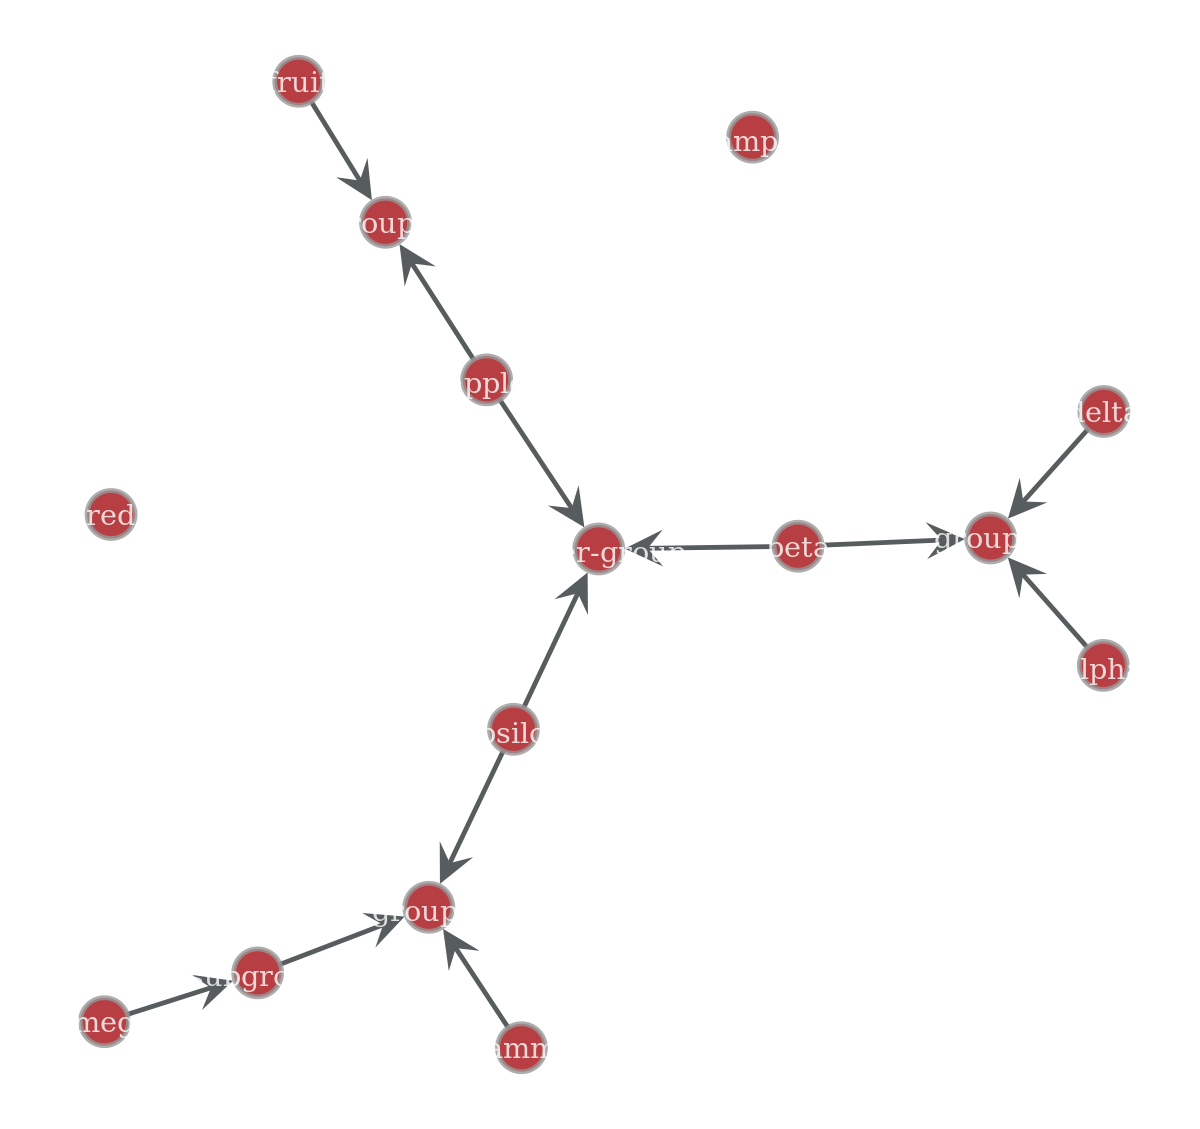

In [39]:
igraph = graph.pgraph_in
igraph.draw()

In [40]:
igraph["other-group"]

<DocumentVertex 'other-group'>

In [157]:
graph["omega"].shortest_path_to(graph["group-b"])

([<DocumentVertex 'omega'>,
  <DocumentVertex 'subgroup'>,
  <DocumentVertex 'group-b'>],
 [<DocumentEdge "'omega' -[in]-> 'subgroup'">,
  <DocumentEdge "'subgroup' -[in]-> 'group-b'">])

In [165]:
list(graph["alpha"].out_edges())[2].elements["is"]

In [167]:
import rdflib
rdflib.graph.Graph

rdflib.graph.Graph

In [48]:
graph.subgraph_around(graph["alpha"]).graph

<GraphView object, directed, with 0 vertices and 0 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd6296bd90, at 0x7fbd59157100>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd6296bd90, at 0x7fbd59183be0>, False), at 0x7fbd6296bd90>

In [145]:
v.document

In [82]:
sg = graph.subgraph_around(graph["group-b"], False)
sg.graph

<GraphView object, directed, with 4 vertices and 4 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd3758b580, at 0x7fbd37574670>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd3758b580, at 0x7fbd37574fd0>, False), at 0x7fbd3758b580>

In [42]:
sg.graph

<GraphView object, directed, with 0 vertices and 0 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd59260670, at 0x7fbd5915ceb0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd59260670, at 0x7fbd592945e0>, False), at 0x7fbd59260670>

In [21]:
list(sg.vertices)

[]

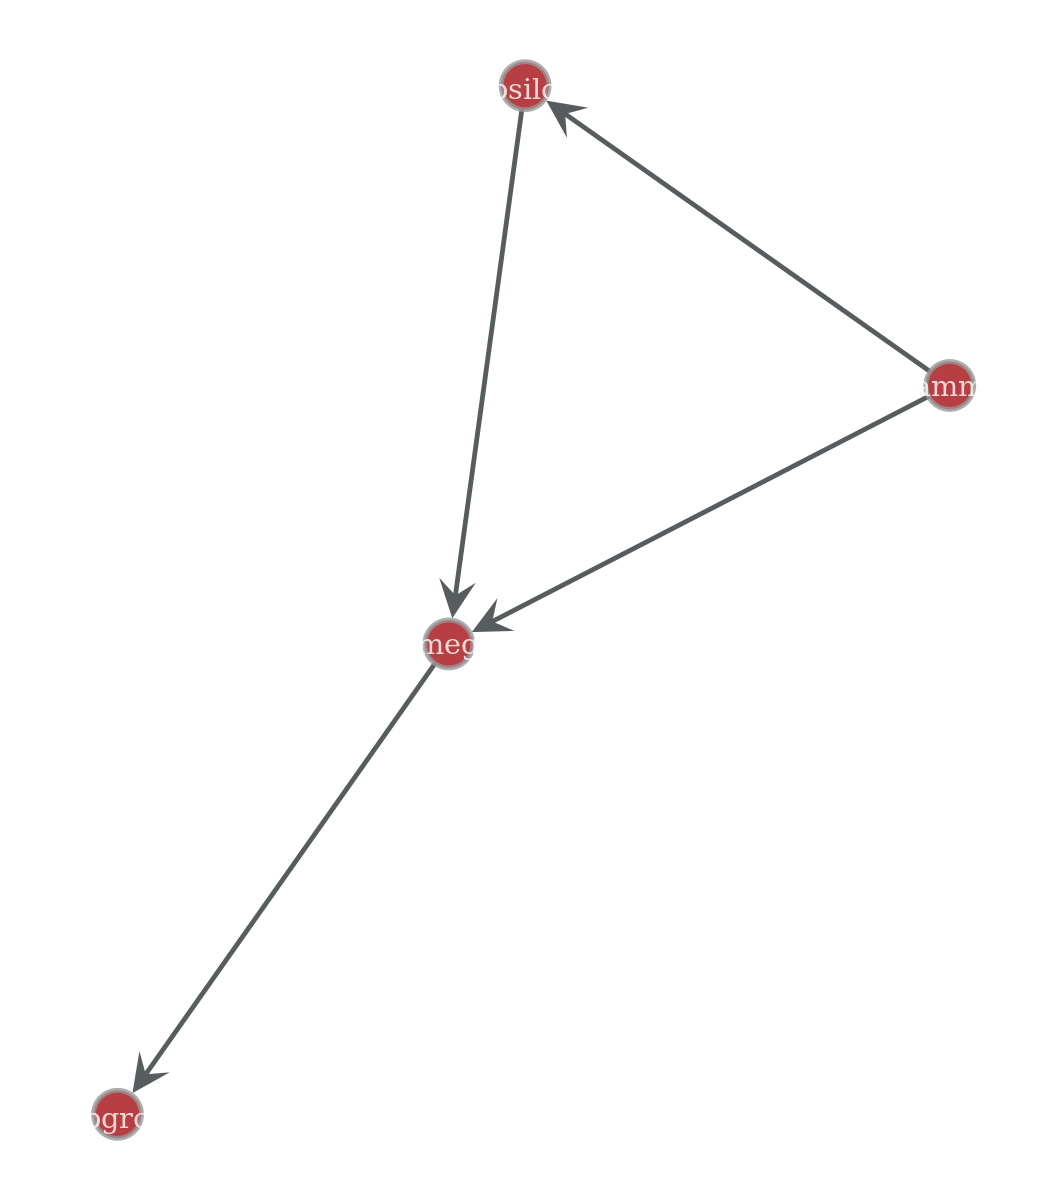

In [83]:
sg.draw()

In [100]:
schema = graph.graphql_schema
schema.execute("""
{
    nodeByName(name: "gamma", filter: { predicate: "ref" })
    {
        name
        allNeighbors { name }
    }
}
""")

<GraphView object, directed, with 15 vertices and 8 edges, 3 internal vertex properties, 2 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbd3749f640, at 0x7fbd3747c880>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbd3749f640, at 0x7fbd3747c9a0>, False), at 0x7fbd3749f640>


ExecutionResult(data={'nodeByName': {'name': 'gamma', 'allNeighbors': [{'name': 'epsilon'}, {'name': 'omega'}, {'name': 'delta'}, {'name': 'alpha'}, {'name': 'beta'}]}}, errors=None)

In [180]:
schema

ExecutionResult(data={'nodeByName': {'id': 'aa6f2fc3-e4da-4e8f-a156-608016504415', 'name': 'alpha'}}, errors=None)

In [125]:
a, b = parsed
b["n_nodes"]

13